# mnist Intro 

In this notebook, we take a look at the mnist dataset and use TensorFlow to try and recognize some digits we generate ourselves using an image editor.


In [1]:
# import required modules

import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

print(tf.__version__)

2.18.0


In [2]:
# get mnist data 

path = 'mnist.npz'

# get data - this will be cached 
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Now let's take a look at mnist data.

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


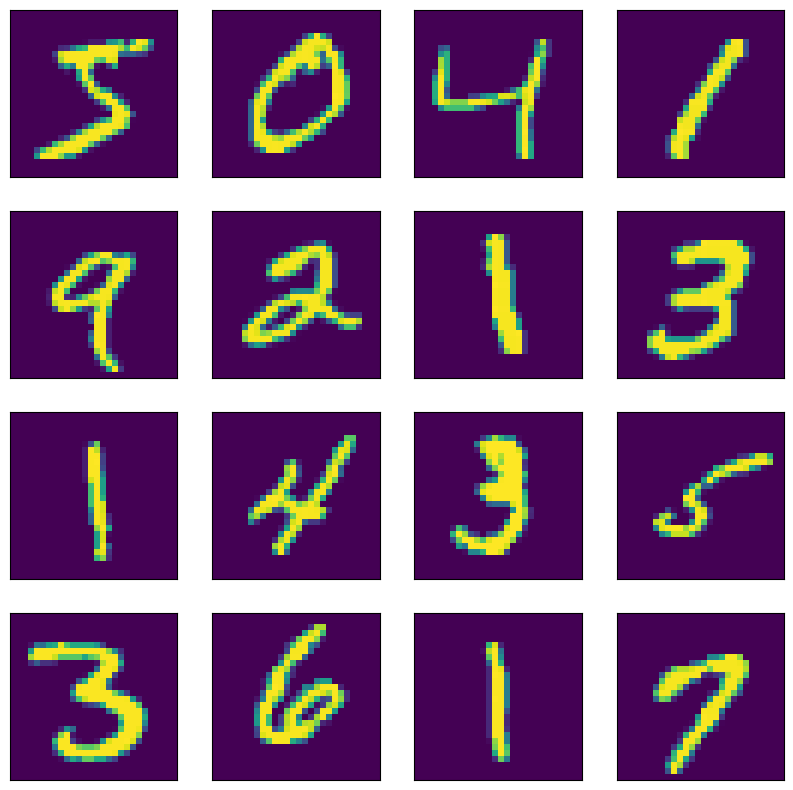

In [4]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], aspect=1)
plt.show()

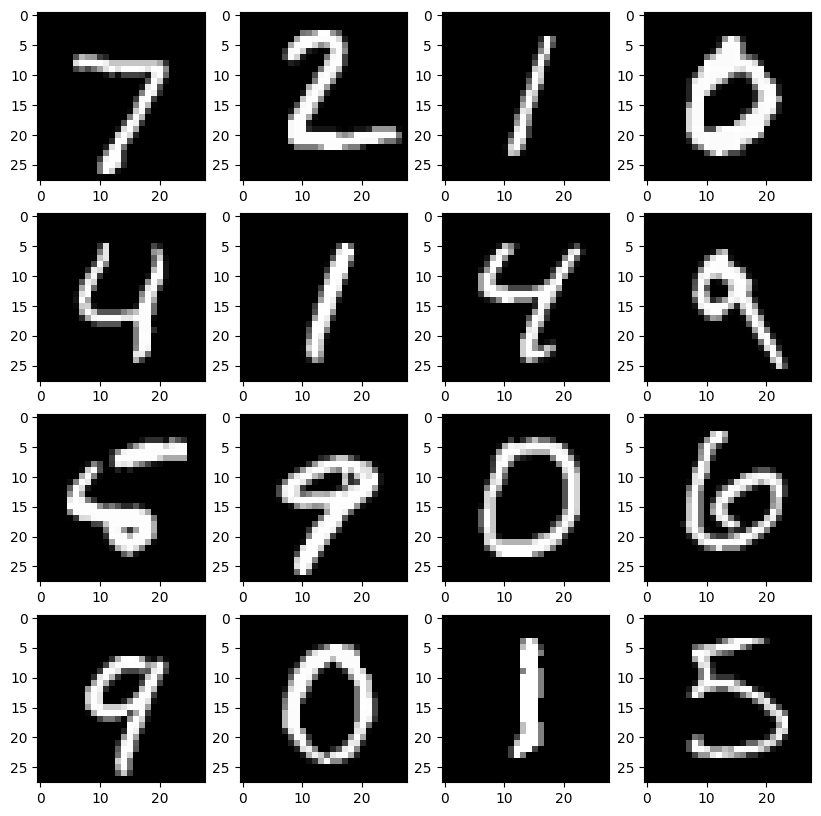

In [5]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i], aspect=1, cmap='gray')
plt.show()

Now let us set up a TF model and train the data.

In [6]:
# set up TF model and train 


# callback 
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    print(logs)
    if(logs.get('accuracy') > 0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True
                            
callbacks = myCallback()

# normalise 
x_train, x_test = x_train/255.0, x_test/255.0

# create model 
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

# fit model
history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

# stats 
print(history.epoch, history.history['accuracy'][-1])

c:\Users\omsha\Desktop\ml_projects-master\myenv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9012 - loss: 0.3386{'accuracy': 0.9419833421707153, 'loss': 0.1999642252922058}
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9013 - loss: 0.3381
Epoch 2/10
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9757 - loss: 0.0823{'accuracy': 0.9760000109672546, 'loss': 0.07980959117412567}
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9757 - loss: 0.0823
Epoch 3/10
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9843 - loss: 0.0504{'accuracy': 0.9833666682243347, 'loss': 0.053675077855587006}
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9843 - loss: 0.0504
Epoch 4/10
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9888 - loss: 0.0350{'accuracy': 0.987933337688446, 'loss': 0.037429939955472946}
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9888 - loss: 0.0350
Epoch 5/10
1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9919 - loss: 0.0248{'

Now let's try a prediction. We are expecting a *6*.

In [7]:
res = model.predict(x_test[11:12])
print(res)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
[[2.7769293e-05 2.9207298e-12 4.9231005e-07 7.6079798e-10 7.6797193e-08
  3.0372501e-04 9.9941778e-01 2.3362454e-10 2.5018715e-04 1.9737804e-10]]


You can see that it does a correct prediction as element 6 has the highets value. Now let's add a **softmax** layer at the output.

In [8]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
res = probability_model.predict(x_test[11:12])
index = np.argmax(res)
print(res)
print(index)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[[0.0853464  0.08534403 0.08534407 0.08534403 0.08534403 0.08536995
  0.23185407 0.08534403 0.08536538 0.08534403]]
6


As you can see above, this is a more convenient way of getting the prediction.

Now let's load our own images and try some predictions. Here are the images we generated using GIMP. They are 28x28 grayscale images. 

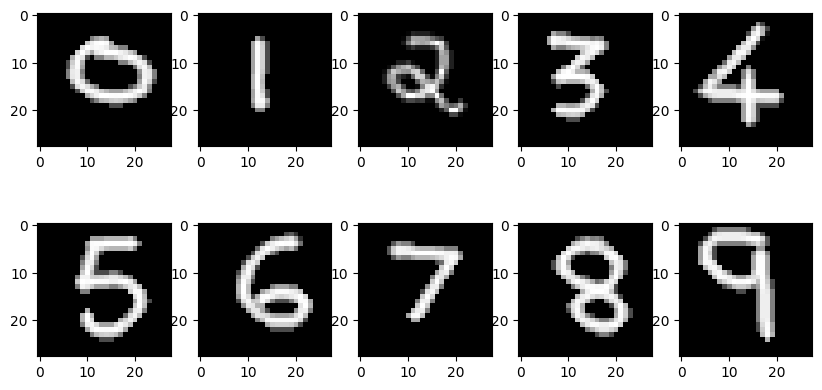

In [9]:
# display the digit images we created 
img_names = ['0.png', '1.png','2.png','3.png','4.png','5.png','6.png','7.png','8.png','9.png']
imgs = [np.array(Image.open(img_name)) for img_name in img_names]

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(imgs[i], aspect=1, cmap='gray')
plt.show()

Now let's try to predict.

In [10]:
def predict():
    img_data = np.array(imgs)
    res = probability_model.predict(img_data)
    print([np.argmax(a) for a in res])
predict()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
[np.int64(9), np.int64(2), np.int64(2), np.int64(3), np.int64(6), np.int64(5), np.int64(6), np.int64(2), np.int64(8), np.int64(8)]


So we got 6 out 10 digits correct. 

Let's see if we can improve this by creating a better model.

In [11]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(model2.summary())

# fit model
history2 = model2.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

# stats 
print(history.epoch, history.history['accuracy'][-1])

c:\Users\omsha\Desktop\ml_projects-master\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     2,769,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,774,858 (10.59 MB)

 Trainable params: 2,774,858 (10.59 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9246 - loss: 0.2481{'accuracy': 0.9610000252723694, 'loss': 0.13010168075561523}
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.9246 - loss: 0.2480
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9867 - loss: 0.0435{'accuracy': 0.9869833588600159, 'loss': 0.04263724014163017}
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9867 - loss: 0.0435
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9919 - loss: 0.0246{'accuracy': 0.9915666580200195, 'loss': 0.026077674701809883}

Reached 99% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9919 - loss: 0.0246
[0, 1, 2, 3, 4] 0.9907666444778442


(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
[[4.2057377e-10 3.6160213e-14 4.2901693e-10 2.7875553e-09 8.8022254e-12
  3.2408060e-10 1.3091995e-17 1.0000000e+00 1.6222473e-11 1.7181923e-08]]
[np.int64(7)]


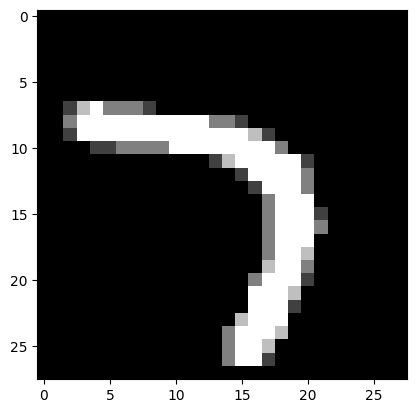

In [12]:
img_input = x_test[60:61]
print(img_input.shape)
res = model2.predict(img_input)
print(res)
print([np.argmax(a) for a in res])
plt.imshow(img_input.reshape(28, 28), aspect=1, cmap='gray')

In [14]:
# Ensure `img_data` has the correct shape
img_data = img_data.reshape(img_data.shape[0], 28, 28, 1)

# Check the number of elements in `img_data`
print(f"Number of images in dataset: {img_data.shape[0]}")

# Access the first element if there are fewer than 6 images
index = 5 if img_data.shape[0] > 5 else 0
img_input = img_data[index]

print(f"Shape of img_data: {img_data.shape}")
print(f"Shape of img_input: {img_input.shape}")

# Predict using the model
res = model2.predict(img_input.reshape(1, 28, 28, 1))
print("Prediction results:", res)
print("Predicted classes:", [np.argmax(a) for a in res])

# Display the image
plt.imshow(img_input.reshape(28, 28), aspect=1, cmap='gray')
plt.show()


NameError: name 'img_data' is not defined